# **W13 G4 - Multimodal ICA**
Contents:
* Introduction
* Assumptions
* Step-by-step
* Strengths and Limitations
* Example

# **Introduction**

**ICA**: statistical technique used to separate a multivariate signal into additive, independent non-Gaussian components


**Multimodal**: different sources of data that describe the same phenomenon, providing different perspectives
* time-serie: audio, video, electrical signal...
* collections of "snapshots": images, samples...

**Multimodal ICA**: jointly decomposes several datasets to find common underlying patterns (=shared independent components)

Applications:
- Neuroimaging: Identify networks expressed across modalities
- Condition Monitoring: Integrate vibration, acoustic, and thermal data for predictive maintenance
- Sensor Fusion: Combine data from heterogeneous sensors (e.g., radar, LiDAR, cameras) to improve perception in autonomous systems
- Robotics & Control: Combine vision, force, and motion signals for robust control strategies

# **Assumptions**
**ICA**:
* Observed data are linear mixtures of unknown independent sources
  * The mixing matrix tells how much each source contributes to each observed signal
* The sources are statistically independent and non-Gaussian

**Multimodal ICA**:
* Linear mixture assumption:
  * Still holds within each modality ($X = AS$)
  * The mixing matrices across modalities differ because each modality measures the sources differently
  * Relationships between features across modalities can be non-linear
* Independence assumption:
  * Sources are assumed to be independent within each modality
  * Multimodal ICA seeks linked components across modalities, so correspondence (or correlation) is encouraged between modalities
* Non-Gaussian assumption:
  * Still required for identifiability, but each modality may have different distributions.

# **Main steps**

1. Data collection
2. Preprocessing of each modality
  * Normalization
  * Dimensionality reduction (PCA)
3. Combine all modalities into a joint representation
4. Apply ICA on the combined data
  * Estimate independent components
  * Compute Mixing matrices for each modality
5. Components interpretation
  * Spatial maps
  * Time courses
  * Connectivity patterns
6. Validate
  * Check independence and stability of components
  * Use cross-validation or replicate on subsets



**Step 3: Combine all modalities into a joint representation**

---
**Concatenation**: concatenate data, without explicit assumption about how modalities relate

$X_{\text{concat}} = [X^{(1)}_{\text{PCA}}, X^{(2)}_{\text{PCA}}, \dots, X^{(M)}_{\text{PCA}}]
\quad \text{and} \quad
X_{\text{concat}} = A \cdot S$

* Pros: Easy
* Cons: Can be dominated by high-dimensional modalities
---
**Joint ICA (jICA)**: concatenate data, while assuming that modalities share the same mixing matrix $A$ and the same independent components $S$

$X^{(1)} = A \cdot S, \quad
X^{(2)} = A \cdot S, \quad
\dots, \quad
X^{(M)} = A \cdot S$

* Pros: Strong coupling between modalities
* Cons: Assumes strong similarity, which may not hold in practice
---
**Linked ICA (LICA)**: keep separate modality-specific mixing matrices but enforce shared independent components $S$ across modalities
$X^{(1)} = A^{(1)} \cdot S, \quad
X^{(2)} = A^{(2)} \cdot S, \quad
\dots, \quad
X^{(M)} = A^{(M)} \cdot S$

* Pros: Maintains modality-specific structure
* Pros: Allows partial linkage → some shared, some modality-specific
* Cons: More complex optimization

Variation: **Full Information LICA (FI-LICA)** : Handles missing data

---
**Canonical Correlation + ICA (CCA-ICA)**: project each modality into a correlated subspace via CCA, then apply ICA in that shared space

$Z^{(m)} = W^{(m)} \cdot X^{(m)} \quad \text{(CCA projection)}$
$Z_{\text{concat}} = A \cdot S \quad \text{(ICA on correlated subspace)}$

* Pros: Reduces noise and focuses on shared variations
* Cons: Adds complexity and assumptions

# **Strengths and Limitations**

**Strengths**:
- Can handle diverse data type
- Captures shared and unique modality components
- Captures complex relationships

**Limitations**:
- Still assuming components independance and linear mixing within modalities
- Computationally intensive
- Sensitive to preprocessing approach
- Interpretation can be subjective


## Example - multimodal EEG–fMRI
- Biessmann, Felix & Plis, Sergey & Meinecke, Frank & Eichele, Tom & Müller, Klaus-Robert. (2011). Analysis of Multimodal Neuroimaging Data. IEEE reviews in biomedical engineering. 4. 26-58. 10.1109/RBME.2011.2170675.

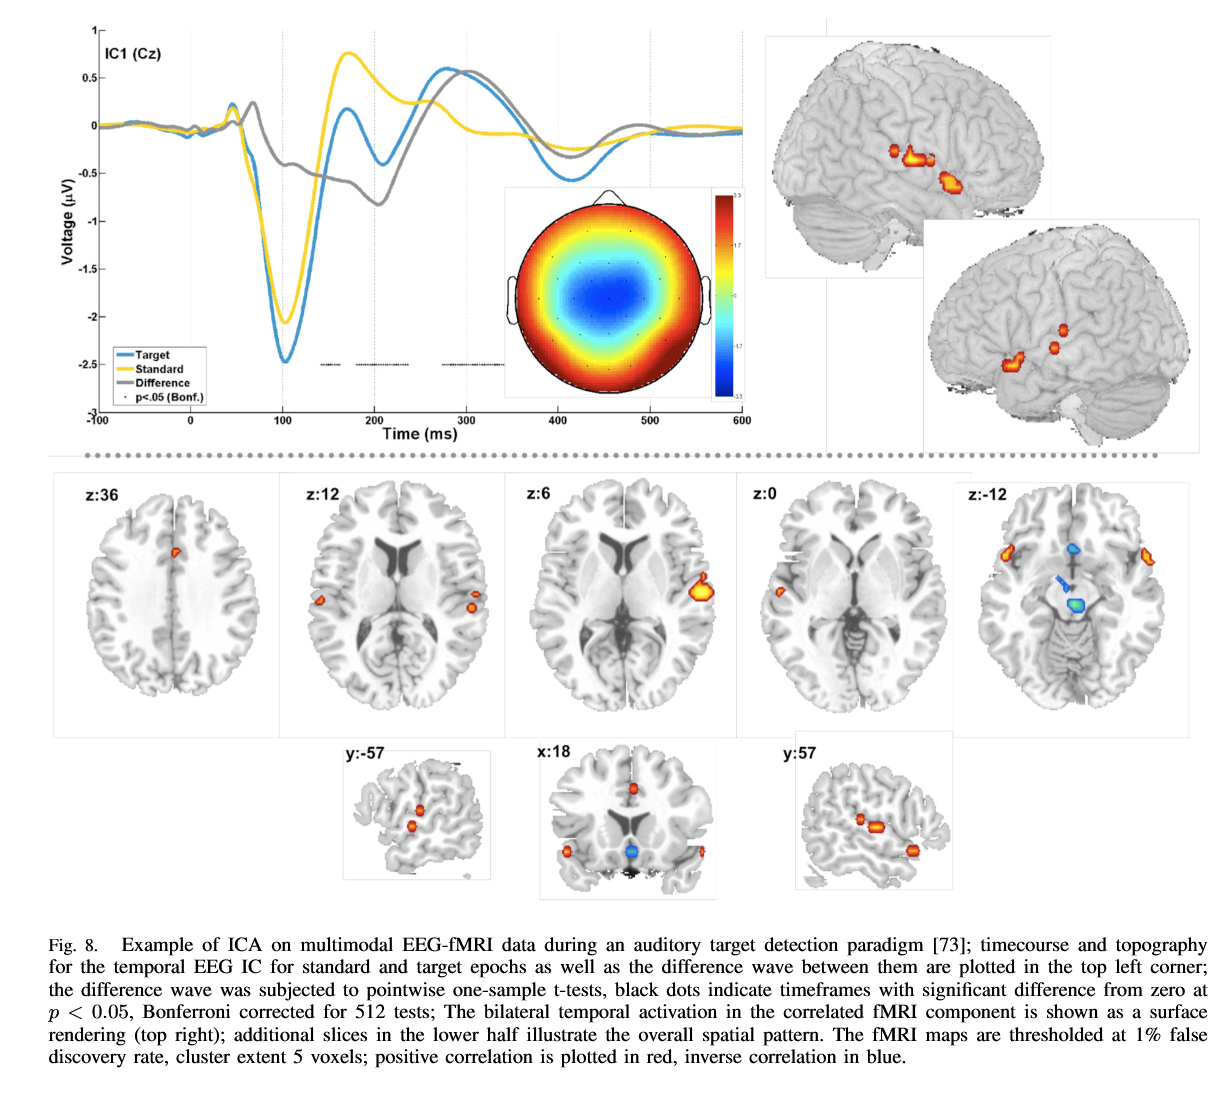

# Example

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.jneurosci.org%2Fcontent%2F32%2F18%2F6053&psig=AOvVaw1e8UavE97iKWGNv4mzMyKJ&ust=1764154160894000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCPjW8tGQjZEDFQAAAAAdAAAAABAE